## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  72.578390  1623.451209  0.471042  6.092697  1.506163
1  24.276912  1364.529222  0.215944  1.658688  1.412316
2  77.335201   401.288593  0.446364  5.235735  1.227713
3  30.277271  1360.267240  0.269842  9.794886  1.447825
4  27.987890   198.507105  0.726291  9.983106  1.389977


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0742902	total: 68.6ms	remaining: 1m 8s
1:	learn: 1.0649305	total: 69.2ms	remaining: 34.5s
2:	learn: 1.0553237	total: 69.8ms	remaining: 23.2s
3:	learn: 1.0444144	total: 70.3ms	remaining: 17.5s
4:	learn: 1.0337011	total: 70.8ms	remaining: 14.1s
5:	learn: 1.0235141	total: 71.4ms	remaining: 11.8s
6:	learn: 1.0137011	total: 71.7ms	remaining: 10.2s
7:	learn: 1.0035538	total: 72.2ms	remaining: 8.95s
8:	learn: 0.9953075	total: 72.6ms	remaining: 8s
9:	learn: 0.9834442	total: 73.1ms	remaining: 7.24s
10:	learn: 0.9720689	total: 73.6ms	remaining: 6.61s
11:	learn: 0.9624160	total: 74ms	remaining: 6.09s
12:	learn: 0.9503516	total: 74.5ms	remaining: 5.66s
13:	learn: 0.9412774	total: 75ms	remaining: 5.28s
14:	learn: 0.9313443	total: 75.4ms	remaining: 4.95s
15:	learn: 0.9209517	total: 76ms	remaining: 4.67s
16:	learn: 0.9108621	total: 76.4ms	remaining: 4.42s
17:	learn: 0.9021139	total: 76.8ms	remaining: 4.19s
18:	learn: 0.8919452	total: 77.1ms	remaining: 3.98s
1

96:	learn: 0.4545463	total: 109ms	remaining: 1.01s
97:	learn: 0.4514503	total: 109ms	remaining: 1.01s
98:	learn: 0.4492529	total: 110ms	remaining: 1s
99:	learn: 0.4464779	total: 110ms	remaining: 994ms
100:	learn: 0.4433418	total: 111ms	remaining: 988ms
101:	learn: 0.4408759	total: 111ms	remaining: 981ms
102:	learn: 0.4381139	total: 112ms	remaining: 975ms
103:	learn: 0.4351716	total: 112ms	remaining: 968ms
104:	learn: 0.4322203	total: 113ms	remaining: 961ms
105:	learn: 0.4294967	total: 113ms	remaining: 956ms
106:	learn: 0.4265539	total: 114ms	remaining: 949ms
107:	learn: 0.4238407	total: 114ms	remaining: 943ms
108:	learn: 0.4214301	total: 115ms	remaining: 937ms
109:	learn: 0.4186871	total: 115ms	remaining: 931ms
110:	learn: 0.4162585	total: 115ms	remaining: 924ms
111:	learn: 0.4133896	total: 116ms	remaining: 918ms
112:	learn: 0.4112789	total: 116ms	remaining: 911ms
113:	learn: 0.4087477	total: 117ms	remaining: 906ms
114:	learn: 0.4062282	total: 117ms	remaining: 899ms
115:	learn: 0.40393

274:	learn: 0.2043272	total: 186ms	remaining: 491ms
275:	learn: 0.2036239	total: 187ms	remaining: 490ms
276:	learn: 0.2031131	total: 187ms	remaining: 489ms
277:	learn: 0.2025536	total: 188ms	remaining: 488ms
278:	learn: 0.2020437	total: 188ms	remaining: 486ms
279:	learn: 0.2015534	total: 189ms	remaining: 486ms
280:	learn: 0.2010480	total: 189ms	remaining: 484ms
281:	learn: 0.2005753	total: 190ms	remaining: 483ms
282:	learn: 0.2001722	total: 190ms	remaining: 482ms
283:	learn: 0.1996641	total: 191ms	remaining: 480ms
284:	learn: 0.1992040	total: 191ms	remaining: 479ms
285:	learn: 0.1986915	total: 191ms	remaining: 478ms
286:	learn: 0.1982346	total: 192ms	remaining: 477ms
287:	learn: 0.1976913	total: 192ms	remaining: 475ms
288:	learn: 0.1972214	total: 193ms	remaining: 474ms
289:	learn: 0.1967422	total: 193ms	remaining: 472ms
290:	learn: 0.1962810	total: 193ms	remaining: 471ms
291:	learn: 0.1958430	total: 194ms	remaining: 470ms
292:	learn: 0.1955055	total: 194ms	remaining: 469ms
293:	learn: 

517:	learn: 0.0880581	total: 291ms	remaining: 271ms
518:	learn: 0.0877887	total: 291ms	remaining: 270ms
519:	learn: 0.0873524	total: 292ms	remaining: 269ms
520:	learn: 0.0870118	total: 292ms	remaining: 269ms
521:	learn: 0.0866997	total: 293ms	remaining: 268ms
522:	learn: 0.0863460	total: 293ms	remaining: 267ms
523:	learn: 0.0860878	total: 293ms	remaining: 266ms
524:	learn: 0.0858279	total: 294ms	remaining: 266ms
525:	learn: 0.0856118	total: 294ms	remaining: 265ms
526:	learn: 0.0853816	total: 294ms	remaining: 264ms
527:	learn: 0.0849800	total: 295ms	remaining: 264ms
528:	learn: 0.0847304	total: 296ms	remaining: 263ms
529:	learn: 0.0844330	total: 296ms	remaining: 262ms
530:	learn: 0.0840848	total: 297ms	remaining: 262ms
531:	learn: 0.0838407	total: 297ms	remaining: 261ms
532:	learn: 0.0834315	total: 297ms	remaining: 261ms
533:	learn: 0.0831427	total: 298ms	remaining: 260ms
534:	learn: 0.0828204	total: 298ms	remaining: 259ms
535:	learn: 0.0825833	total: 299ms	remaining: 258ms
536:	learn: 

689:	learn: 0.0533152	total: 368ms	remaining: 166ms
690:	learn: 0.0532482	total: 369ms	remaining: 165ms
691:	learn: 0.0530032	total: 369ms	remaining: 164ms
692:	learn: 0.0529164	total: 370ms	remaining: 164ms
693:	learn: 0.0527686	total: 370ms	remaining: 163ms
694:	learn: 0.0526831	total: 371ms	remaining: 163ms
695:	learn: 0.0525556	total: 371ms	remaining: 162ms
696:	learn: 0.0524910	total: 371ms	remaining: 161ms
697:	learn: 0.0523420	total: 372ms	remaining: 161ms
698:	learn: 0.0522584	total: 372ms	remaining: 160ms
699:	learn: 0.0521528	total: 372ms	remaining: 160ms
700:	learn: 0.0520816	total: 373ms	remaining: 159ms
701:	learn: 0.0518995	total: 373ms	remaining: 158ms
702:	learn: 0.0518153	total: 374ms	remaining: 158ms
703:	learn: 0.0517457	total: 374ms	remaining: 157ms
704:	learn: 0.0516834	total: 375ms	remaining: 157ms
705:	learn: 0.0516009	total: 375ms	remaining: 156ms
706:	learn: 0.0514549	total: 375ms	remaining: 156ms
707:	learn: 0.0513864	total: 376ms	remaining: 155ms
708:	learn: 

937:	learn: 0.0319991	total: 472ms	remaining: 31.2ms
938:	learn: 0.0319634	total: 473ms	remaining: 30.7ms
939:	learn: 0.0319281	total: 473ms	remaining: 30.2ms
940:	learn: 0.0318832	total: 474ms	remaining: 29.7ms
941:	learn: 0.0318553	total: 474ms	remaining: 29.2ms
942:	learn: 0.0318109	total: 475ms	remaining: 28.7ms
943:	learn: 0.0317146	total: 475ms	remaining: 28.2ms
944:	learn: 0.0315723	total: 475ms	remaining: 27.7ms
945:	learn: 0.0315290	total: 476ms	remaining: 27.2ms
946:	learn: 0.0315017	total: 476ms	remaining: 26.7ms
947:	learn: 0.0314815	total: 477ms	remaining: 26.1ms
948:	learn: 0.0314601	total: 477ms	remaining: 25.6ms
949:	learn: 0.0313210	total: 478ms	remaining: 25.1ms
950:	learn: 0.0312945	total: 478ms	remaining: 24.6ms
951:	learn: 0.0312748	total: 479ms	remaining: 24.1ms
952:	learn: 0.0312324	total: 479ms	remaining: 23.6ms
953:	learn: 0.0312131	total: 480ms	remaining: 23.1ms
954:	learn: 0.0310770	total: 480ms	remaining: 22.6ms
955:	learn: 0.0310511	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

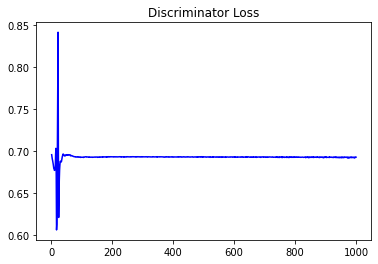

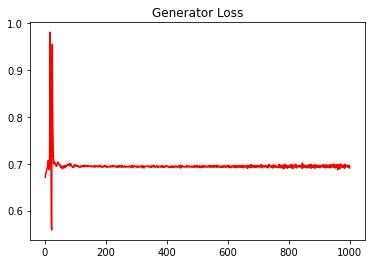

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10287330184271284


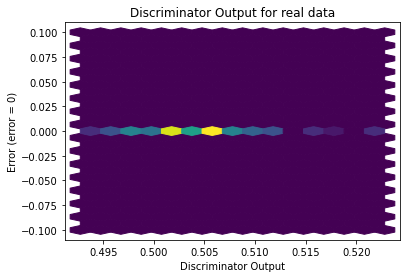

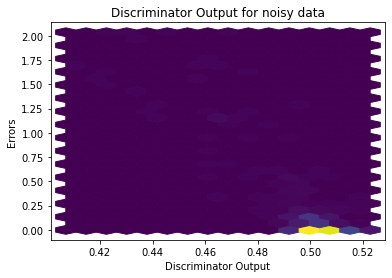

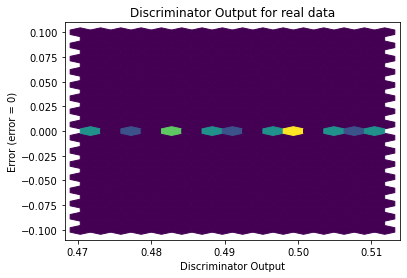

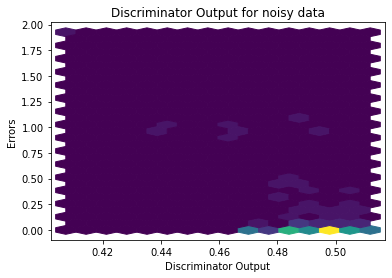

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


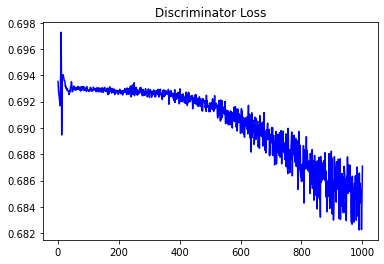

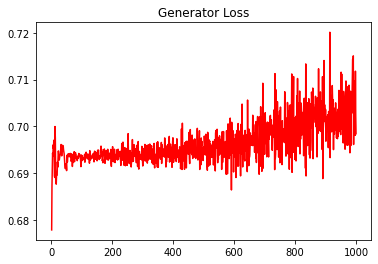

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1001694456224869


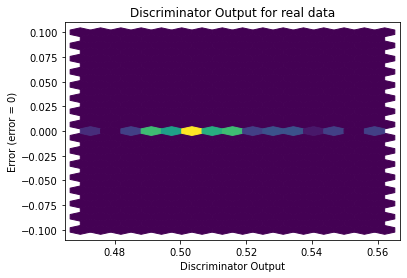

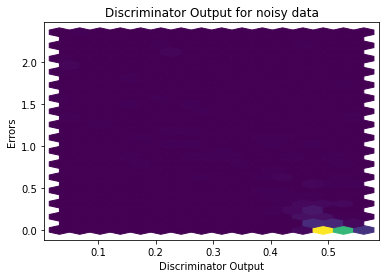

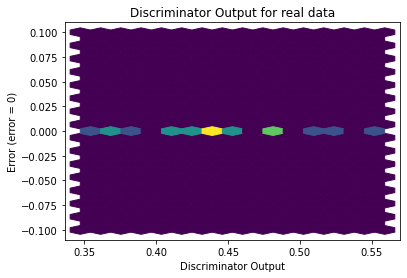

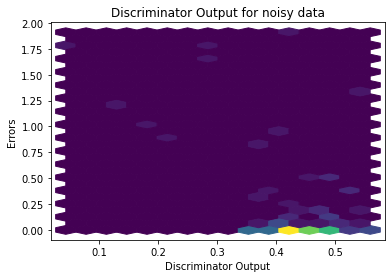

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1137]], requires_grad=True)
